<a href="https://colab.research.google.com/github/peteryu24/petercoding-python/blob/main/convolution_neuralnetwork_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170508288/170498071 [==============================] - 4s 0us/step
Epoch 1/30
391/391 - 162s - loss: 1.6542 - accuracy: 0.3921 - val_loss: 1.2772 - val_accuracy: 0.5345 - 162s/epoch - 414ms/step
Epoch 2/30
391/391 - 160s - loss: 1.2222 - accuracy: 0.5652 - val_loss: 1.0249 - val_accuracy: 0.6379 - 160s/epoch - 409ms/step
Epoch 3/30
391/391 - 160s - loss: 1.0447 - accuracy: 0.6318 - val_loss: 0.9360 - val_accuracy: 0.6744 - 160s/epoch - 410ms/step
Epoch 4/30
391/391 - 160s - loss: 0.9324 - accuracy: 0.6732 - val_loss: 0.8254 - val_accuracy: 0.7106 - 160s/epoch - 410ms/step
Epoch 5/30
391/391 - 161s - loss: 0.8595 - accuracy: 0.7000 - val_loss: 0.7703 - val_accuracy: 0.7384 - 161s/epoch - 411ms/step
Epoch 6/30
391/391 - 161s - loss: 0.7986 - accuracy: 0.7188 - val_loss: 0.7474 - val_accuracy: 0.7380 - 161s/epoch - 412ms/step
Epoch 7/30
391/391 - 160s - loss: 0.7583 - accuracy: 0.7333 - val_loss: 0.7129 - val_accuracy: 0.7533 - 160s/epoch - 408ms/step
Epoch 8/30
391/391 - 160s - loss: 0.7

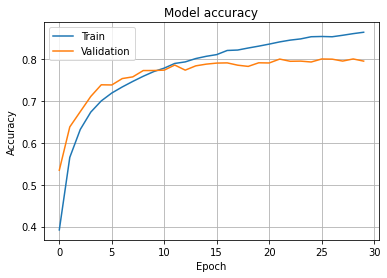

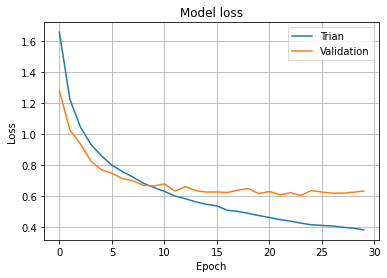

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

#after reading CIFAR-10 dataset convert to neural network type
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
#no need to reshape for cifar-10 (prints to tensor)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#construct neural network model
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

#learn neural network model
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

#evaluating neural network model accuracy
res=cnn.evaluate(x_test,y_test,verbose=0)
print("Accuracy: ",res[1]*100)

import matplotlib.pyplot as plt

#accuracy graph
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

#loss function graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Trian','Validation'],loc='best')
plt.grid()
plt.show()